<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Jinyu, my name is Dmitrii. I'm going to review your project! Nice to meet you! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
    
- Overall well done! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.
- It is great that you can use different methods for data processing and apply them to real data and project tasks, keep it up! 
- There is only one comment to be fixed: 
  - Try aggregated data to fill missing values in `model_year`, `cylinders`, and `odometer`.

I will wait for you to send me a new version of the project :)
    
</div>

<div class="alert alert-info"> <b>Student comments:</b> Hello, Dmitrii. Thank you for reviewing my project! Nice to meet you too!</div>    

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 

Hi Jinyu, thank you for leaving your comments/feedback in the project :)
Now, no critial issues left and everything is perfect. 

Please keep up the great work and good luck on the next project! 
</div>

# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Purposes of the project

The purposes of the project is to find out what factors influence the price of a vehicle. 

## Action plan

1. Initial data exploration
2. Data cleaning 
  - handling missing values
  - fix data types
  - treat outliers
  - create new variables if needed
3. Study the core parameters and relationships
4. Conclusion

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
- Great that you added additional information about project tasks. It gives an overview of what you are going to achieve in this project.


## Initialization

In [1]:
# Loading all the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load data

In [2]:
# Load the data file into a DataFrame
car_data = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `type`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# print the general/summary information about the DataFrame

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data

print(car_data.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automat

The dataset has 51525 rows and 13 columns. The data type for `model_year`, `cylinders` and `is_4wd` is `float64`, which does not make sense. `model_year` and `date_posted` are perhaps better to be datatime type. `cylinders` and `is_4wd` should be integer type. The data type for all the other variables looks good.   

The general information and the printed data sample look reasonable except that those three variables mentioned above do not seem to have to correct data type. 

In [5]:
missing_perct = (car_data.isna().sum())/car_data.shape[0]*100
print(missing_perct)

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
A good start and first view on data. 
It is always helpful to calculate the percentage of missing values. It helps to understand the overall impact and to make a more weighted decision regarding what to do next.
    
Also great that all imports and data load are grouped in different cells before the project.


</div>

The results above show the percentage of missing values for each column. The variable `is_4wd` has 50.37% of its data missing, which is a lot! About 18% of the `paint_color` are missing values. The columns `odometer`, `cylinders`, and `model_year` have around 15%, 10% and 7% missing values, respectively. 

In [6]:
car_data['is_4wd'].value_counts(dropna=False)

NaN    25953
1.0    25572
Name: is_4wd, dtype: int64

In [7]:
car_data['paint_color'].value_counts(dropna=False)

white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [8]:
car_data['odometer'].value_counts(dropna=False)

NaN         7892
0.0          185
140000.0     183
120000.0     179
130000.0     178
            ... 
51595.0        1
111381.0       1
155940.0       1
43402.0        1
74063.0        1
Name: odometer, Length: 17763, dtype: int64

In [9]:
car_data['cylinders'].value_counts(dropna=False)

8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

### Conclusions and further steps

Initial exploration of the dataset reveals the following findings with action steps:
1. The columns `price`, `condition`, `fuel`, `transmission` and `type` look reasonable so far. 
2. The columns `model_year` and `date_posted` should have datatime data type. Becasue the age of cars is critical for its sale price, we should create a new variable that calculates the age of cars. 
3. The column `model` looks ok. But we might need to re-code its values to make them easy to work with. 
4. The data type of the `cylinders` column should be changed to integer data type. 
5. The column `is_4wd` has about 50% of values missing. 
6. The column `paint_color` has about 18% of values missing. 
7. It seems that `is_4wd` contains a boolean type of information (yes/no). It has 25572 rows with 1.0 and 25953 rows with missing values. It is likely that the missing values should be 0, which stands for `is_4wd` = no. So we will fill missing data with 0 in the `is_4wd` column. This will likely allow us extract some useful information.
8. We will fill missing data with 'unknown' in the `paint_color` column because it is not possible to fill these values based on other car features.
9. Potentially `model_year` and `condition` could be correlated with `odometer`. So we will fill the missing values in 
`odometer` with group median based on `model_year` and `condition`.
10. The `model_year` may be highly related to the car's `model` and `condition`. Thus, we will fill in missing values in `model_year` with values based on `model` and `condition`. 


## Treat missing values (if any)

In [10]:
# car_data2 = car_data.drop(['is_4wd', 'paint_color'], axis=1)

# car_data2.dropna(subset=['model_year', 'cylinders', 'odometer'], axis=0, inplace=True )
# missing_perct = (car_data2.isna().sum())/car_data2.shape[0]*100
# print(missing_perct)

We removed the columns `is_4wd` and `paint_color` from the dataset because they do not appear to be key variables for cars' price. Moreover, the variables `odometer`, `cylinders`, and `model_year` might be important for determining cars' price. So we kept these columns and removed all rows with missing values in these three columns. Now there are no missing values in the dataset. 

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>

That is a good start and you have a clear reasoning. However in many cases it is more beneficial to try to restore missing data, as by deleting it we can lose potentially important insights. 

**`is_4wd`**
    
`is_4wd` contains a boolean type of information (yes/no). So filling missing data with 0 will allow us to keep a potentially useful feature.
    
**`paint_color`**   

So, here I can recommend to fill it with 'unknown' or any other placeholder, as it is not possible to fill this value based on other car features.
    
For other columns it can be helpful to try to restore missing data. Here we can check the relationship between feature with missing values and other vehicle characteristics to find a grouped value. 
    
**`model_year`**
  
Potentially model_year could be indeed correlated with odometer or car condition.

And you can use the following code as an example: 
    
    data['odometer']= data['odometer'].fillna(data.groupby(['model_year', 'condition'])['odometer'].transform('median'))
    
Can you please give it a try?

<div class="alert alert-info"> <b>Student comments:</b> Sure. I will redo the treating missing value part. I commented out my old code, so it does not interfere wiht my new code. </div>   

We will fill missing data with 0 in the `is_4wd` column.

In [11]:
car_data['is_4wd'] = car_data['is_4wd'].fillna(0)

We will fill missing data with 'unknown' in the `paint_color` column because it is not possible to fill these values based on other car features.

In [12]:
car_data['paint_color'] = car_data['paint_color'].fillna('unknown')

Potentially `model_year` and `condition` could be correlated with `odometer`. So we will fill the missing values in 
`odometer` with group median based on `model_year` and `condition`.

In [13]:
car_data['odometer']= car_data['odometer'].fillna(
    car_data.groupby(['model_year', 'condition'])['odometer'].transform('median'))

In [14]:
car_data['odometer'].value_counts(dropna=False)

NaN         556
120000.0    453
98000.0     416
90700.0     326
126000.0    306
           ... 
12898.0       1
29991.0       1
105656.0      1
94991.0       1
90214.0       1
Name: odometer, Length: 17810, dtype: int64

We see that there are still some missing values in `odometer`. Because we have much fewer missing values in `odometer`, now we can drop rows with missing values in `odometer`.

The number of cylinders in a car may be highly related to the car's model and year of the model. Thus, we will fill in missing values in `cylinders` with values based on `model_year` and `model`. 

In [15]:
car_data['cylinders'] = car_data['cylinders'].fillna(
    car_data.groupby(['model_year', 'model'])['cylinders'].transform('median'))

In [16]:
car_data['cylinders'].value_counts(dropna=False)

8.0     17497
6.0     17354
4.0     15354
10.0      564
NaN       389
5.0       310
3.0        34
7.0        17
9.0         2
12.0        2
5.5         1
4.5         1
Name: cylinders, dtype: int64

The `model_year` may be highly related to the car's `model` and `condition`. Thus, we will fill in missing values in `model_year` with values based on `model` and `condition`. 


In [17]:
car_data['model_year'] = car_data['model_year'].fillna(
    car_data.groupby(['model', 'condition'])['model_year'].transform('median'))

In [18]:
car_data['model_year'].value_counts(dropna=False)

2013.0    4023
2012.0    3983
2011.0    3763
2014.0    3643
2015.0    3463
          ... 
1954.0       1
1949.0       1
1948.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 82, dtype: int64

Next, we will drop all rows that still have missing values. 

In [59]:
car_data2 = car_data.dropna(subset=['model_year', 'cylinders', 'odometer'], axis=0 )

Let's check if there are still any missing values in any of the columns.

In [20]:
missing_perct = (car_data2.isna().sum())/car_data2.shape[0]*100
print(missing_perct)

price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
dtype: float64


Now the data does not have missing values!

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

You have done great work with missing values! Now you saved data and filled it with related values - win/win :)

## Fix data types

In [21]:
car_data2.loc[:,'model_year'] = pd.to_datetime(car_data2.loc[:,'model_year'], format='%Y')

# Add datetime values for when the ad was placed
car_data2.loc[:,'date_posted'] = pd.to_datetime(car_data2.loc[:,'date_posted'], format='%Y-%m-%d')

car_data2.loc[:,'cylinders'] = car_data2.loc[:,'cylinders'].astype('int32')
car_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50635 entries, 0 to 51524
Data columns (total 13 columns):
price           50635 non-null int64
model_year      50635 non-null datetime64[ns]
model           50635 non-null object
condition       50635 non-null object
cylinders       50635 non-null int32
fuel            50635 non-null object
odometer        50635 non-null float64
transmission    50635 non-null object
type            50635 non-null object
paint_color     50635 non-null object
is_4wd          50635 non-null float64
date_posted     50635 non-null datetime64[ns]
days_listed     50635 non-null int64
dtypes: datetime64[ns](2), float64(2), int32(1), int64(2), object(6)
memory usage: 5.2+ MB


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you checked data types.

We changed the data type of the columns `model_year` and `date_posted` to datatime data type. We also changed the data type of the column `cylinders` to integer data type. Then, we look at the general information of the dataset again, all columns now have reasonable data types. 

## Enrich data

In [22]:
# Add the vehicle's age when the ad was placed
car_data2.loc[:,'age'] = (car_data2.loc[:,'date_posted']  - car_data2.loc[:,'model_year']).dt.days/365 + 1
# car_data2
# car_data2.info()
car_data2.loc[:,'age'].describe()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


count    50635.000000
mean        10.024737
std          6.108174
min          1.000000
25%          5.643836
50%          8.969863
75%         13.394521
max        111.586301
Name: age, dtype: float64

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Here you can slso add  +1 to the equation above to take into account the current year. Otherwise, it will lead to multiple 0 in `vehicle_age` (as below) and as a result infinite values in `yearly_mileage`. 



<div class="alert alert-info"> <b>Student comments:</b> Yes! That is a good point. I added 1 to the age calculation. </div>  

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
🙌

Some cars have `age` = 111.586. Those seem to be really old cars. 

In [23]:
# Add the vehicle's average mileage per year

car_data2.loc[:,'yearly_mileage'] = np.round(car_data2.loc[:,'odometer'] /car_data2.loc[:,'age'])
# car_data2

In [24]:
# look at the unique values and counts for the condition column

car_data2['condition'].value_counts()

excellent    24385
good         19756
like new      4666
fair          1581
new            136
salvage        111
Name: condition, dtype: int64

In [25]:
car_data2[(car_data2['condition'] == 'salvage')]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,yearly_mileage
317,600,1999-01-01,toyota camry le,salvage,4,gas,216348.0,automatic,sedan,white,0.0,2019-03-04,23,21.183562,10213.0
439,1000,2008-01-01,ford f150,salvage,8,gas,285000.0,automatic,pickup,white,0.0,2018-10-19,19,11.805479,24141.0
519,5500,2012-01-01,nissan frontier,salvage,6,gas,120000.0,automatic,truck,white,1.0,2018-05-20,9,7.386301,16246.0
686,999,1995-01-01,toyota 4runner,salvage,6,gas,164221.0,automatic,SUV,red,0.0,2018-05-03,33,24.350685,6744.0
1503,850,2003-01-01,honda civic,salvage,4,hybrid,229704.0,automatic,sedan,brown,0.0,2018-12-23,39,16.986301,13523.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50269,500,2008-01-01,nissan versa,salvage,4,gas,225000.0,automatic,hatchback,black,0.0,2018-10-18,33,11.802740,19063.0
50698,3500,2006-01-01,honda accord,salvage,4,gas,106251.0,automatic,sedan,unknown,0.0,2018-06-11,23,13.449315,7900.0
50816,5000,2017-01-01,dodge grand caravan,salvage,6,gas,20000.0,automatic,mini-van,unknown,0.0,2018-08-18,7,2.627397,7612.0
50854,2900,2013-01-01,hyundai sonata,salvage,4,gas,57500.0,automatic,sedan,blue,0.0,2018-10-28,22,6.824658,8425.0


In [26]:
# Let's write a function that replace the condition values with something that can be manipulated more easily

def recode_condition(condition):
    
    if condition ==  'salvage':
        return 0
    elif condition ==  'fair':
        return 1
    elif condition ==  'good':
        return 2
    elif condition ==  'excellent':
        return 3
    elif condition ==  'like new':
        return 4
    else:
        return 5

In [27]:
car_data2.loc[:,'condition'] = car_data2.loc[:,'condition'].apply(recode_condition)

## Check clean data

In [28]:
# print the general/summary information about the DataFrame

car_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50635 entries, 0 to 51524
Data columns (total 15 columns):
price             50635 non-null int64
model_year        50635 non-null datetime64[ns]
model             50635 non-null object
condition         50635 non-null int64
cylinders         50635 non-null int32
fuel              50635 non-null object
odometer          50635 non-null float64
transmission      50635 non-null object
type              50635 non-null object
paint_color       50635 non-null object
is_4wd            50635 non-null float64
date_posted       50635 non-null datetime64[ns]
days_listed       50635 non-null int64
age               50635 non-null float64
yearly_mileage    50635 non-null float64
dtypes: datetime64[ns](2), float64(4), int32(1), int64(3), object(5)
memory usage: 6.0+ MB


In [29]:
# print a sample of data

car_data2.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,age,yearly_mileage
0,9400,2011-01-01,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,8.479452,17100.0
1,25500,2008-01-01,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,11.805479,7514.0
2,5500,2013-01-01,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7.104110,15484.0
3,1500,2003-01-01,ford f-150,1,8,gas,193850.0,automatic,pickup,unknown,0.0,2019-03-22,9,17.230137,11251.0
4,14900,2017-01-01,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,3.249315,24898.0
5,14990,2014-01-01,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,5.468493,10598.0
6,12990,2015-01-01,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,4.989041,15877.0
7,15990,2013-01-01,honda pilot,3,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7.019178,15596.0
8,11500,2012-01-01,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,7.542466,13812.0
9,9200,2008-01-01,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,12.131507,12133.0


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [30]:
car_data2.describe()

,price,condition,cylinders,odometer,is_4wd,days_listed,age,yearly_mileage
count,50635.000000,50635.000000,50635.000000,50635.000000,50635.000000,50635.000000,50635.000000,50635.000000
mean,12136.267285,2.638333,6.119581,115177.365498,0.496416,39.543695,10.024737,13120.302479
std,10043.252461,0.711961,1.657046,62461.145247,0.499992,28.187960,6.108174,6981.203158
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5000.000000,2.000000,4.000000,72796.000000,0.000000,19.000000,5.643836,9190.000000
50%,9000.000000,3.000000,6.000000,114479.000000,0.000000,33.000000,8.969863,12409.000000
75%,16803.000000,3.000000,8.000000,153000.000000,1.000000,53.000000,13.394521,15859.500000
max,375000.000000,5.000000,12.000000,990000.000000,1.000000,271.000000,111.586301,219353.000000


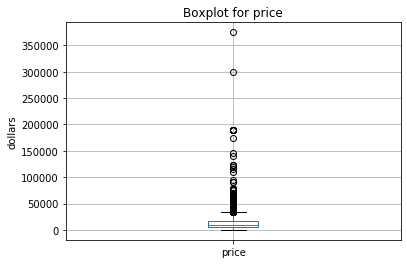

In [31]:
# boxplot of price
# car_data2.plot('price',kind='hist', bins=10)
car_data2.boxplot(column='price')
plt.title('Boxplot for price')
plt.ylabel('dollars')
plt.show()

Around 75% of the cars have price below 16803. Some cars have unusually high prices (outilers). 

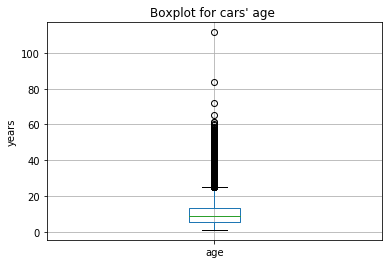

In [32]:
# boxplot of age
car_data2.boxplot(column='age')
plt.title("Boxplot for cars' age ")
plt.ylabel('years')
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Adding titles to your graphs is important for providing context for the users so they understand what they are looking at. Together with for example legends and axis labels this is important to support unambiguous interpretation of displayed information.

<div class="alert alert-info"> <b>Student comments:</b> Yes! That is a good point. </div>  

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Thanks for adding that! 

Around 75% of the cars have age below 13.39 years. Some cars have unusually old age (outilers). 

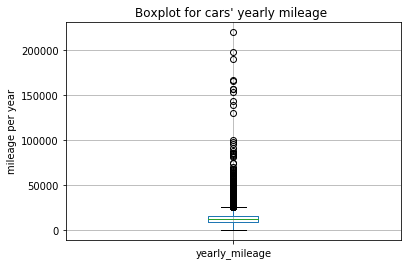

In [33]:
# boxplot of yearly_mileage

car_data2.boxplot(column='yearly_mileage')
plt.title("Boxplot for cars' yearly mileage ")
plt.ylabel('mileage per year')
plt.show()

Around 75% of the cars have yearly mileage below 15859 miles. Some cars have unusually high yearly mileage (outilers). 

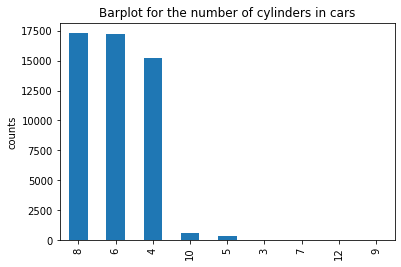

In [34]:
# barplot of cylinders
car_data2['cylinders'].value_counts().plot(kind='bar')
plt.title("Barplot for the number of cylinders in cars")
plt.ylabel('counts')
plt.show()

Most cars have 4, 6 or 8 cylinders. Very few cars have 3, 5, 7, 9, 10, or 12 cylinders.

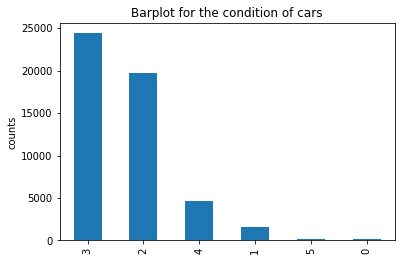

In [35]:
# barplot of condition
car_data2['condition'].value_counts().plot(kind='bar')
plt.title("Barplot for the condition of cars")
plt.ylabel('counts')
plt.show()


Most cars are in good or excellent condition. There are some but not many cars in fair or like new condition. Very few cars are in new or salvage condition.



## Study and treat outliers

The above analysis shows that the columns `price`, `age` and `yearly_mileage` have outliers. We want to create a DataFrame without those outliers. First, let's identify the outliers by defining the lower/upper limits for the normal range of values for each column.

In [36]:
# Determine if there are still more outliers in each column

def check_outlier(col_name, df):
    '''
    The check_outlier checks if there are outliers in a column
    '''
    # col_name is a string
    MIN, Q1, Q3, MAX = df[col_name].quantile([0, 0.25, 0.75, 1.0])
    IQR = Q3 - Q1
    lower_limit, upper_limit = Q1-1.5*IQR, Q3+1.5*IQR
    print(f'The lower limit for the normal range of {col_name} is {lower_limit}')
    print(f'The upper limit for the normal range of {col_name} is {upper_limit}')
    print(f'The minimum of {col_name} is {MIN}')
    print(f'The maximum of {col_name} is {MAX}')


In [37]:
check_outlier('price',car_data2 )

The lower limit for the normal range of price is -12704.5
The upper limit for the normal range of price is 34507.5
The minimum of price is 1.0
The maximum of price is 375000.0


In [38]:
check_outlier('age',car_data2 )

The lower limit for the normal range of age is -5.982191780821917
The upper limit for the normal range of age is 25.02054794520548
The minimum of age is 1.0
The maximum of age is 111.58630136986301


In [39]:
check_outlier('yearly_mileage',car_data2 )

The lower limit for the normal range of yearly_mileage is -814.25
The upper limit for the normal range of yearly_mileage is 25863.75
The minimum of yearly_mileage is 0.0
The maximum of yearly_mileage is 219353.0


Now let's define a function that removes outliers from a column. 

In [40]:

def remove_outlier(col_name, df):
    '''
    The remove_outlier function removes outlier in a column.
    '''
    # col_name is a string
    keep_removing = True
    while keep_removing:
        MIN, Q1, Q3, MAX = df[col_name].quantile([0, 0.25, 0.75, 1.0])
        IQR = Q3 - Q1
        lower_limit, upper_limit = Q1-1.5*IQR, Q3+1.5*IQR
        df = df.loc[(df[col_name] > lower_limit) &  (df[col_name] < upper_limit)]
        
        MIN, Q1, Q3, MAX = df[col_name].quantile([0, 0.25, 0.75, 1.0])
        IQR = Q3 - Q1
        lower_limit, upper_limit = Q1-1.5*IQR, Q3+1.5*IQR
        if MIN > lower_limit and MAX < upper_limit:
            keep_removing = False
    
    return df

In [41]:

car_data2 = remove_outlier('price', car_data2)
car_data2 = remove_outlier('age', car_data2)
car_data2 = remove_outlier('yearly_mileage', car_data2)

In [42]:
check_outlier('price',car_data2 )

The lower limit for the normal range of price is -10005.0
The upper limit for the normal range of price is 29995.0
The minimum of price is 1.0
The maximum of price is 30000.0


In [43]:
check_outlier('odometer',car_data2 )

The lower limit for the normal range of odometer is -32600.25
The upper limit for the normal range of odometer is 264837.75
The minimum of odometer is 977.0
The maximum of odometer is 434762.0


In [44]:
check_outlier('age',car_data2 )

The lower limit for the normal range of age is -4.476712328767122
The upper limit for the normal range of age is 24.38904109589041
The minimum of age is 1.0
The maximum of age is 24.38082191780822


In [45]:
check_outlier('yearly_mileage',car_data2 )

The lower limit for the normal range of yearly_mileage is 622.0
The upper limit for the normal range of yearly_mileage is 24098.0
The minimum of yearly_mileage is 623.0
The maximum of yearly_mileage is 24095.0


The data is heavily right-tailded. The outliers has been removed to the best of my capability. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! You perfectly identified and handled outliers. You can additionally check a nice article about working with outliers:
- https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
</div>

## Study core parameters without outliers

In [46]:
car_data2.duplicated().sum()

0

It shows that the `car_data2` dataframe has no duplicated rows. 

In [47]:
car_data2.describe()

,price,condition,cylinders,odometer,is_4wd,days_listed,age,yearly_mileage
count,43799.000000,43799.000000,43799.000000,43799.000000,43799.000000,43799.000000,43799.000000,43799.000000
mean,10619.113108,2.619192,6.027626,118551.174148,0.477408,39.533003,10.145208,12483.357839
std,7253.566657,0.698179,1.649339,56730.370458,0.499495,28.178580,4.981841,4441.200775
min,1.000000,0.000000,3.000000,977.000000,0.000000,0.000000,1.000000,623.000000
25%,4995.000000,2.000000,4.000000,78939.000000,0.000000,19.000000,6.347945,9425.500000
50%,8700.000000,3.000000,6.000000,117897.000000,0.000000,33.000000,9.509589,12301.000000
75%,14995.000000,3.000000,8.000000,153298.500000,1.000000,53.000000,13.564384,15294.500000
max,30000.000000,5.000000,12.000000,434762.000000,1.000000,271.000000,24.380822,24095.000000


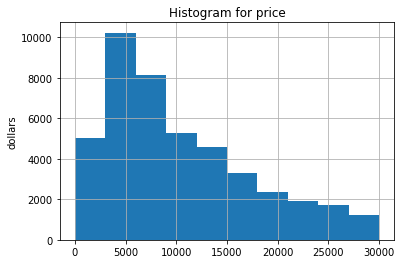

In [48]:
# boxplot of price
# car_data2.plot('price',kind='hist', bins=10)
car_data2.hist(column='price')
plt.title('Histogram for price')
plt.ylabel('dollars')
plt.show()

After removing the extreme outliers, the `price` variable still has some but not many outliers. The distribution of `price` is right-skewed. The car sale prices range from 1 to 30000 dollars, with median price at 8700 dollars. 

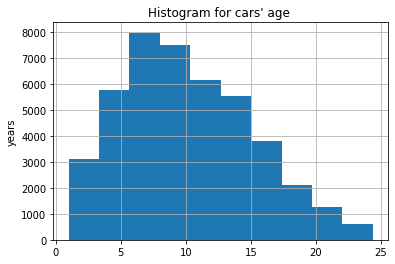

In [49]:
# boxplot of age
car_data2.hist(column='age')
plt.title("Histogram for cars' age ")
plt.ylabel('years')
plt.show()

After removing the extreme outliers, the `age` variable still has some but not many outliers. The distribution of `age` is slightly right-skewed. The age of cars range from 1 year to 24.38 years, with median age at 9.51 years. 

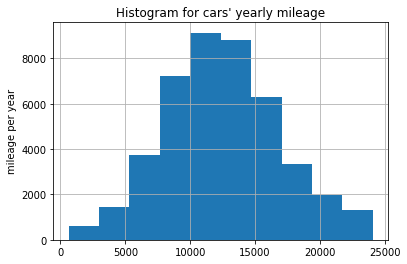

In [50]:
car_data2.hist(column='yearly_mileage')
plt.title("Histogram for cars' yearly mileage")
plt.ylabel('mileage per year')
plt.show()

After removing the extreme outliers, the `yearly_mileage` variable does not have any outliers. The distribution of `yearly_mileage` is slightly right-skewed. The yearly mileage of cars range from 623 to 24095 miles, with median at 12301 miles. 

## Ads lifetime

In [51]:
car_data2['days_listed'].describe()

count    43799.000000
mean        39.533003
std         28.178580
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

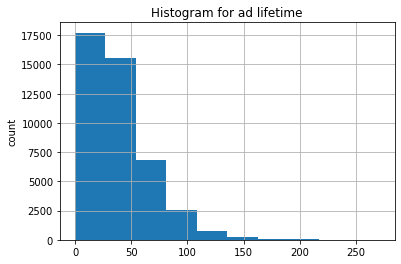

In [52]:
car_data2.hist(column='days_listed')
plt.title("Histogram for ad lifetime")
plt.ylabel('count')
plt.show()

The days of advertisements being displayed range from 0 to 271 days, with median 33 days, and mean 39 days. The histgram indicates the `days_listed` variable is right skewed. The typical lifetime of an ad is somewhere below 50 days. 

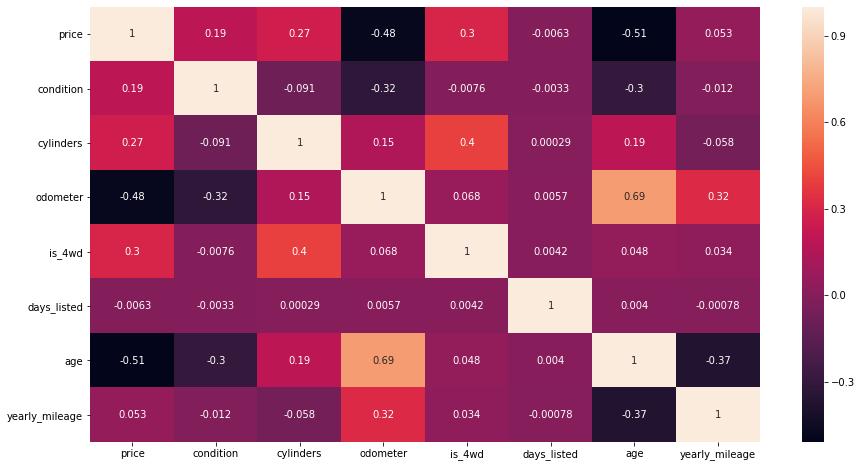

In [53]:
car_data2_quick = car_data2.query('days_listed < 50')
plt.figure(figsize = (15,8))
hm_all = sns.heatmap(car_data2_quick.corr(), annot=True)


We filtered the data and created a dataframe that has `days_listed` less than 50 days. Then, we plotted the 
The correlation heatmap of the new dataframe shows that `days_listed` has pretty weak correlation with other variables. It has a relatively strong negative correlation with the variables `price` and `condition`. It has a relatively strong positive correlation with the variable `odometer`, `is_4wd` and `age`. That indicates if a car is in superior condition and the `odometer` reading is low, then it is easier to sell and the days listed on ad is shorter. 

## Average price per each type of vehicle

In [54]:
type_count_mean = car_data2.pivot_table(index='type', 
                     values='price', 
                     aggfunc = ['count', 'median','mean'])
type_count_mean.columns = ['number_of_ads', 'median_price','mean_price']
print(type_count_mean)

             number_of_ads  median_price    mean_price
type                                                  
SUV                  10959        8495.0  10040.386440
bus                     18       28990.0  19959.166667
convertible            311       12980.0  12622.717042
coupe                 1907       12995.0  13436.788673
hatchback              941        5950.0   6782.413390
mini-van              1036        5999.5   7724.297297
offroad                169       12500.0  13827.946746
other                  204        8797.5   9485.857843
pickup                5537       12995.0  13951.801517
sedan                11087        5995.0   6863.141697
truck                 9692       13900.0  14075.390116
van                    528        6995.0   8150.058712
wagon                 1410        7770.0   8825.321986


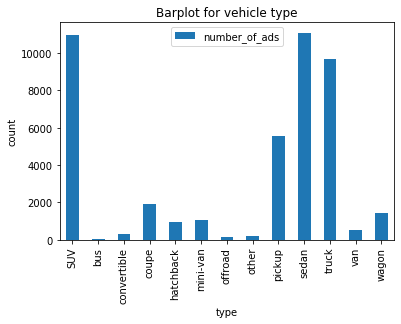

In [55]:
type_count_mean.plot(y='number_of_ads', kind='bar')
plt.title("Barplot for vehicle type")
plt.ylabel('count')
plt.show()

The bar plot shows that SUV and sedan have the top 2 greatest number of the ads, whereas all other types of cars have relatively smaller number of ads. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Typical lifetime of an ad has been correctly identified.

## Price factors

In [56]:
# car_data2

car_data2_SUV = car_data2.query('type == "SUV"')
car_data2_sedan = car_data2.query('type == "sedan"')

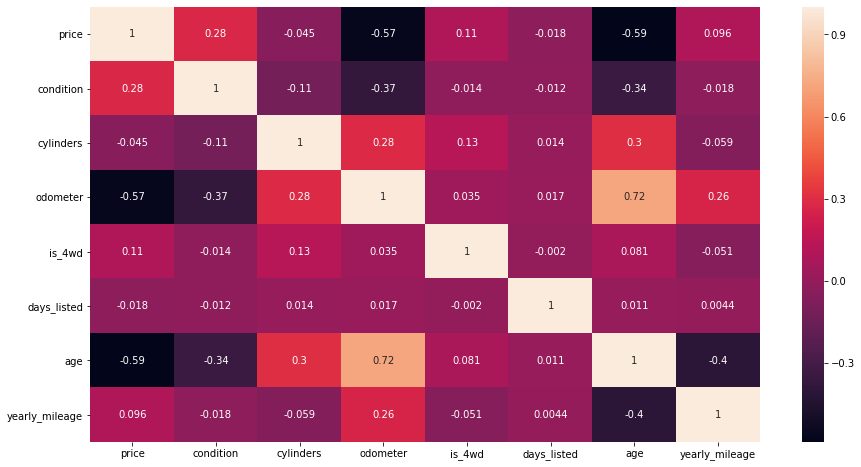

In [57]:
plt.figure(figsize = (15,8))
hm_SUV = sns.heatmap(car_data2_SUV.corr(), annot=True)

The heatmap of the correlation matrix for SUV shows that price of SUV has relatively strong but negative correlation with the age of cars and the odometer reading of cars. Moreover, price has weak but positive correlation with condition of cars and yearly mileage of cars. Finally, price has little correlation with days of ads being listed. 

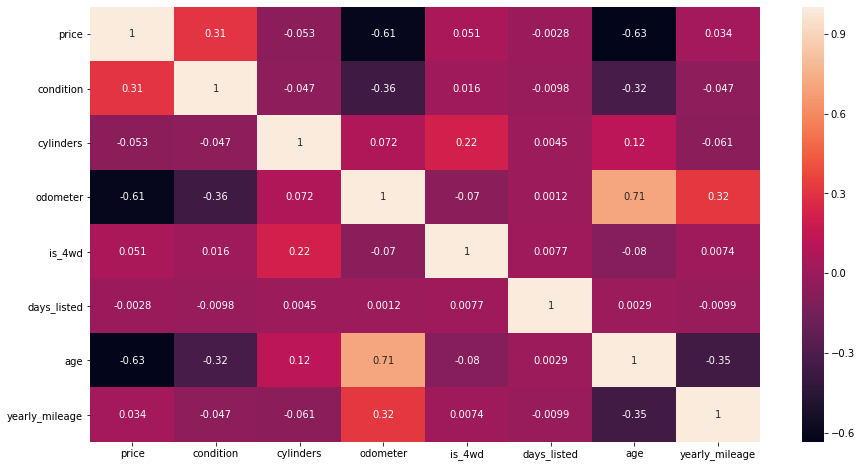

In [58]:
plt.figure(figsize = (15,8))
hm_sedan = sns.heatmap(car_data2_sedan.corr(), annot=True)

The heatmap of the correlation matrix for sedan shows that price of sedan has relatively strong but negative correlation with the age of cars and the odometer reading of cars. Moreover, price has weak but positive correlation with condition of cars and yearly mileage of cars. Finally, price has little correlation with days of ads being listed. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall an excellent data analysis with correct conclusions and different graph types.

Great that you managed to create a correlation matrix (heatmap) to check the correlation of different features.

</div>

## General conclusion

This project aimed to determine the factors that influence prices of vehicles. We started with initial exploraton of the dataset. We identified columns with missing values and wrong data types. Then we removed the columns `is_4wd` and `paint_color` from the dataset and fixed the data types in columns `model_year`, `date_posted`, and `cylinders`. Then, we created a new variable called `age`, which was the age of the vehicle when it was listed for sale.  We also recoded the `codition` column with numeric values. Furthermore, we checked the distribution of the core parameters `price`, `age` and `yearly_odometer` using boxplots and the distribution of `cylinders` and `condition` using barplots. After identifying the heavy right-skewness of the variables `price`, `age` and `yearly_odometer`, we removed the outliers from the dataset. Finally, we studied ad lifetime and average price for each type of vehicle. 

The overall conclusion is that price of vehicles had relatively strong but negative correlation with odometer readings and age of vehicle. Moreover, price had positive correlation with condition of the car. Price did not appear to have strong correlation with any other variables in the dataset. 

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
 
Overall you did a great research. I left some feedback to check above and open questions to understand your reasoning. 
    
A small tip regarding overall conclusion: 
    It represents the overall work progress that you achieved. On a real project, this is probably the only thing the business will read. Therefore, it is crucial to indicate in a structured way all conclusions that you made on each step in the project.

For example:

- Replaced missing values in the following data with the following method.
- Replaced data types in the following columns.
- etc.
- We observe that ... factors impact ... 
- My analysis show ...
- I can recomend the following next steps / activities ...

It is also important to provide explanations and interpretations that will be interesting for business based on your analysis.

</div>

<div class="alert alert-info"> <b>Student comments:</b> Yes! That is a good point. I will re-write it. </div>  

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Thank you for extending your overall conclusions and going an extra mile improving your project! 

This project aimed to determine the factors that influence prices of vehicles. 

The major action steps are:
- We started with initial exploraton of the dataset. We identified columns with missing values and wrong data types. 
- Then we fixed missing values in columns `is_4wd`, `paint_color`, `cylinders`, `odometers`, and `model_year` from the dataset. 
- We fixed the data types in columns `model_year`, `date_posted`, and `cylinders`. 
- Then, we created a new variable called `age`, which was the age of the vehicle when it was listed for sale.  
- We also recoded the `codition` column with numeric values. 
- Furthermore, we checked the distribution of the core parameters `price`, `age` and `yearly_odometer` using boxplots and the distribution of `cylinders` and `condition` using barplots. 
- After identifying the heavy right-skewness of the variables `price`, `age` and `yearly_odometer`, we removed the outliers from the dataset. 
- Finally, we studied ad lifetime and average price for each type of vehicle. 

The overall conclusion is that price of vehicles had relatively strong but negative correlation with odometer readings and age of vehicle. Moreover, price had positive correlation with condition of the car. Price did not appear to have strong correlation with any other variables in the dataset. 